In [ ]:
# 导入所需的包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE


In [5]:
# 导入原始数据集
df = pd.read_csv(r'D:\develop\train.csv')

训练集上的预测准确率为： 0.7984550904922103
测试集上的预测准确率为： 0.7963708333333334


In [9]:
df.describe()

,id,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,...,num_29,num_30,num_31,num_32,num_33,num_34,num_35,num_36,num_37,target
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,...,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,800000.000000
mean,399999.500000,11.326667,93.369439,7.133563,3.910350,3.719691,0.618034,4.059024,3.946736,3.948812,...,17.316756,13.783345,7.036945,4.225609,2.275005,0.151518,3.305656e+03,4451.633843,0.000495,0.013250
std,230940.252013,7.532890,84.283980,2.485475,0.424801,1.155052,0.485869,2.062829,0.403059,0.300025,...,11.062003,11.067024,8.457270,7.156476,5.156571,15.736397,9.300704e+04,8239.089604,0.000690,0.114344
min,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,199999.750000,5.000000,25.000000,7.000000,4.000000,3.000000,0.000000,3.000000,4.000000,4.000000,...,6.000000,2.504976,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.127790,0.000113,0.000000
50%,399999.500000,11.000000,66.000000,7.000000,4.000000,3.000000,1.000000,4.000000,4.000000,4.000000,...,20.000000,12.786394,3.000000,0.703686,0.000000,0.000000,1.144409e-04,698.475656,0.000246,0.000000
75%,599999.250000,17.000000,141.000000,9.000000,4.000000,5.000000,1.000000,5.000000,4.000000,4.000000,...,28.000000,25.000000,12.000000,5.000000,1.995969,0.000000,6.930312e-02,5456.293736,0.000542,0.000000
max,799999.000000,30.000000,357.000000,10.000000,5.000000,6.000000,1.000000,12.000000,5.000000,5.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,5232.081380,4.169229e+07,243447.173298,0.003287,1.000000


In [10]:
df['target'].value_counts()

target
0.0    789400
1.0     10600
Name: count, dtype: int64

<Axes: ylabel='count'>

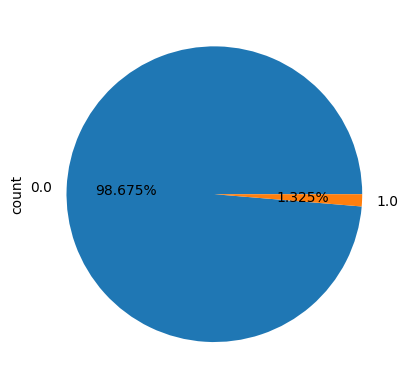

In [12]:
df['target'].value_counts().plot(kind='pie',autopct='%.3f%%')

In [ ]:
# 提取特征矩阵和标签
x = df.iloc[:, 1:-1]
y = df.iloc[:, -1]
# 切分训练集和测试集, 并且进行随机数打乱
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.3, random_state=12)
# 重置训练集和测试集的索引
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.reset_index(drop=True, inplace=True)
# 对所有特征进行归一化处理
mms = MinMaxScaler()
Xtrain = pd.DataFrame(mms.fit_transform(Xtrain), columns=Xtrain.columns)
Xtest = pd.DataFrame(mms.transform(Xtest), columns=Xtest.columns)
# 对训练集进行过采样
model_smote = SMOTE()
Xtrain, Ytrain = model_smote.fit_resample(Xtrain, Ytrain)

# 训练逻辑回归模型，尝试使用 'saga' 优化算法并增加迭代次数
clf = LR(max_iter=20000, C=9.4, solver='saga')
clf = clf.fit(Xtrain, Ytrain)

print('训练集上的预测准确率为：', clf.score(Xtrain, Ytrain))
print('测试集上的预测准确率为：', clf.score(Xtest, Ytest))

In [6]:
# 输出混淆矩阵
print('混淆矩阵：\n', confusion_matrix(Ytest, clf.predict(Xtest)))

混淆矩阵：
 [[188690  48121]
 [   750   2439]]


In [7]:
# 查看测试集上AUC面积
area = roc_auc_score(Ytest, clf.predict_proba(Xtest)[:, 1])
print('AUC面积为：', area)

print(classification_report(Ytest, clf.predict(Xtest)))

AUC面积为： 0.8494619777805693
              precision    recall  f1-score   support

         0.0       1.00      0.80      0.89    236811
         1.0       0.05      0.76      0.09      3189

    accuracy                           0.80    240000
   macro avg       0.52      0.78      0.49    240000
weighted avg       0.98      0.80      0.87    240000



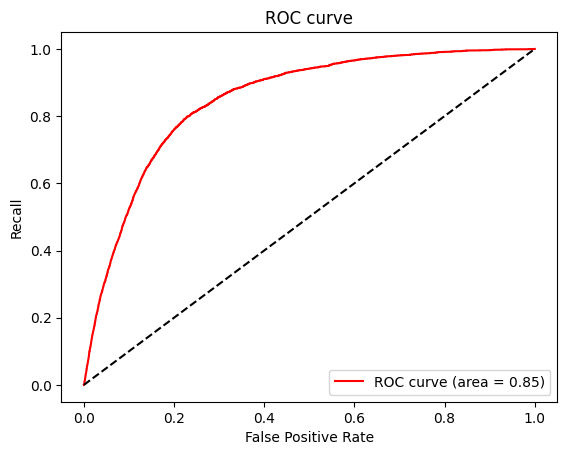

In [8]:
# 绘制ROC曲线
FPR, recall, thresholds = roc_curve(Ytest, clf.predict_proba(Xtest)[:, 1])
plt.figure()
plt.plot(FPR, recall, color='red', label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()